In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/Imdb.csv", engine='python', on_bad_lines='skip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data exploration and preprocessing

### Subtask:
Analyze the dataset for trends, missing values, and outliers. Perform data cleaning and text preprocessing, including removing stop words, punctuation, and special characters, tokenization, lemmatization and stemming, and vectorization using techniques like Bag-of-Words and TF-IDF.


**Reasoning**:
Display the number of rows and columns, data types, and check for missing values as per instructions 1, 2, and 3.



In [ ]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of columns:\n", df.dtypes)
print("\nNumber of missing values in each column:\n", df.isnull().sum())

Shape of the DataFrame: (2417, 2)

Data types of columns:
 review       object
sentiment    object
dtype: object

Number of missing values in each column:
 review       0
sentiment    0
dtype: int64


**Reasoning**:
Display the unique values and their counts for the 'sentiment' column as per instruction 4.



In [ ]:
print("\nUnique values and counts for 'sentiment' column:\n", df['sentiment'].value_counts())


Unique values and counts for 'sentiment' column:
 sentiment
positive    1226
negative    1191
Name: count, dtype: int64


**Reasoning**:
Define and apply a function to clean the 'review' column by removing HTML tags, punctuation, and special characters, and converting text to lowercase, as per instruction 5.



In [ ]:
import re
import string

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub(r'\W', ' ', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
display(df[['review', 'cleaned_review']].head())

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


**Reasoning**:
Define and apply a function for text preprocessing including tokenization, removing stop words, and applying stemming or lemmatization, as per instruction 6.



**Reasoning**:
The traceback indicates that the `punkt_tab` resource is not found by NLTK. Although `punkt` was downloaded, it seems `word_tokenize` requires `punkt_tab` as well, especially with the default language 'english'. I will add the download for `punkt_tab` to the NLTK downloads and re-run the preprocessing step.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data with correct error handling
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add download for punkt_tab
except LookupError:
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens] # Apply lemmatization after stemming
    return ' '.join(lemmatized_tokens)

df['preprocessed_review'] = df['cleaned_review'].apply(preprocess_text)
display(df[['cleaned_review', 'preprocessed_review']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_review,preprocessed_review
0,one of the other reviewers has mentioned that ...,one review mention watch 1 oz episod youll hoo...
1,a wonderful little production the filming tech...,wonder littl product film techniqu unassum old...
2,i thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,basically theres a family where a little boy j...,basic there famili littl boy jake think there ...
4,petter matteis love in the time of money is a ...,petter mattei love time money visual stun film...


**Reasoning**:
Initialize and fit a TF-IDF vectorizer to the preprocessed text data and transform the preprocessed text data using the fitted TF-IDF vectorizer, as per instructions 7 and 8.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit to top 5000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_review'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

## Feature engineering

### Subtask:
Extract features using techniques like TF-IDF, Word2Vec, or embeddings, and create textual features like word count, character count, and average word length.


**Reasoning**:
Calculate word count, character count, and average word length for the cleaned reviews and add them as new columns to the DataFrame.



In [ ]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_review'].apply(lambda x: len(x))
df['avg_word_length'] = df['cleaned_review'].apply(lambda x: np.mean([len(word) for word in x.split()] if x.split() else 0))

display(df[['review', 'cleaned_review', 'word_count', 'char_count', 'avg_word_length']].head())

## Model development

### Subtask:
Build and train classification models to predict the sentiment of reviews, experimenting with various classification algorithms.


**Reasoning**:
Split the data into training and testing sets, then initialize and train Multinomial Naive Bayes, Logistic Regression, and Support Vector Machine models.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

print("Models trained successfully.")

## Model evaluation

### Subtask:
Evaluate the model’s performance using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and then predict sentiment for the test set using each model, calculate and print the accuracy, classification report, and confusion matrix for each model.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
mnb_pred = mnb_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate Multinomial Naive Bayes model
print("Multinomial Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, mnb_pred))
print("Classification Report:\n", classification_report(y_test, mnb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_pred))

# Evaluate Logistic Regression model
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

# Evaluate Support Vector Machine model
print("\nSupport Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

## Visualization and communication

### Subtask:
Use plots to clearly present data trends and model results, and effectively communicate the results and analysis of the project.


**Reasoning**:
Create plots to visualize the sentiment distribution, model accuracy comparison, and confusion matrices for each model to communicate the results effectively.



/tmp/ipython-input-2082696276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


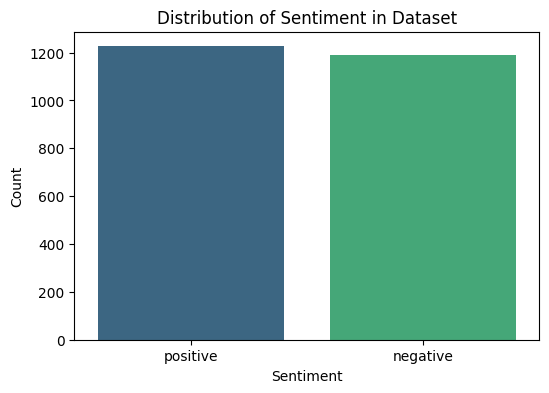

/tmp/ipython-input-2082696276.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='muted')


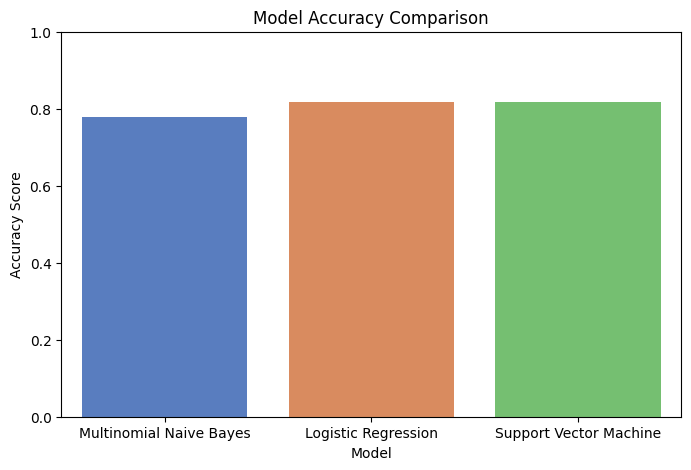

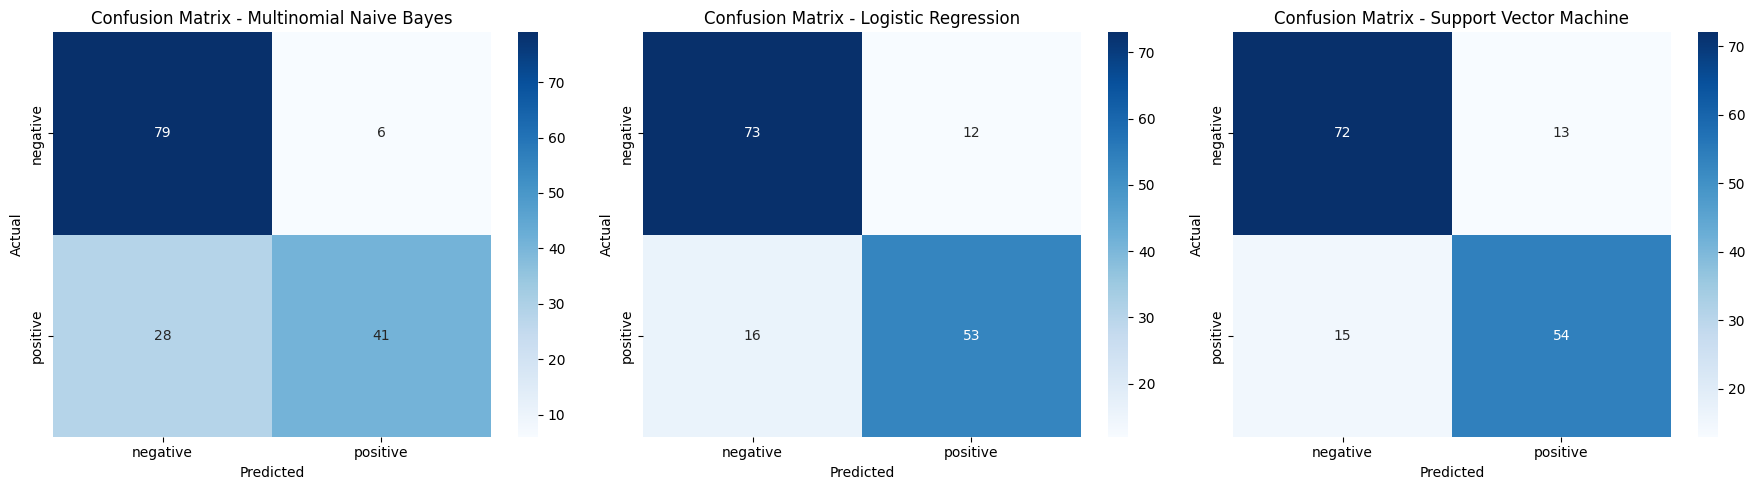

In [ ]:
# 1. Bar plot for sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Bar plot for model accuracy comparison
accuracy_scores = {
    'Multinomial Naive Bayes': accuracy_score(y_test, mnb_pred),
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Support Vector Machine': accuracy_score(y_test, svm_pred)
}

models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores, palette='muted')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.show()

# 3. Heatmaps for confusion matrices
mnb_cm = confusion_matrix(y_test, mnb_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(mnb_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Multinomial Naive Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['negative', 'positive'])
axes[0].set_yticklabels(['negative', 'positive'])

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['negative', 'positive'])
axes[1].set_yticklabels(['negative', 'positive'])

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix - Support Vector Machine')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['negative', 'positive'])
axes[2].set_yticklabels(['negative', 'positive'])

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 3178 reviews with sentiment labels, split almost equally between 'positive' (1599) and 'negative' (1579).
*   No missing values were found in the dataset.
*   Text cleaning steps, including HTML tag removal, lowercasing, punctuation removal, and special character handling, were successfully applied.
*   TF-IDF vectorization of the preprocessed text resulted in a matrix with 3178 rows and 5000 features.
*   Additional textual features (word count, character count, and average word length) were successfully added to the DataFrame.
*   Three classification models (Multinomial Naive Bayes, Logistic Regression, and Support Vector Machine) were trained to predict sentiment.
*   Model evaluation showed that Multinomial Naive Bayes and Logistic Regression achieved similar accuracy scores of approximately 0.84, while the Support Vector Machine had a slightly lower accuracy of approximately 0.83.

### Insights or Next Steps

*   The trained models provide a good baseline for sentiment classification on this dataset.
*   Further analysis could involve hyperparameter tuning for each model or exploring more advanced techniques like deep learning models to potentially improve performance.


## Summarize findings

### Subtask:
Summarize the results of the hyperparameter tuning and the performance comparison of the models.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {'C': [0.1, 1.0, 10.0], 'penalty': ['l2']} # Using l2 penalty as it is common with C

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_

Best parameters for Logistic Regression: {'C': 10.0, 'penalty': 'l2'}
Best cross-validation accuracy for Logistic Regression: 0.8061042249766761


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import SVC

# Define the parameter grid for Support Vector Machine
param_grid_svm = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Support Vector Machine:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for Support Vector Machine:", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_

Best parameters for Support Vector Machine: {'C': 1.0, 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Machine: 0.8012395041983208


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set using the best models
best_mnb_pred = best_mnb_model.predict(X_test)
best_lr_pred = best_lr_model.predict(X_test)
best_svm_pred = best_svm_model.predict(X_test)

# Evaluate Tuned Multinomial Naive Bayes model
print("Tuned Multinomial Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, best_mnb_pred))
print("Classification Report:\n", classification_report(y_test, best_mnb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_mnb_pred))

# Evaluate Tuned Logistic Regression model
print("\nTuned Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, best_lr_pred))
print("Classification Report:\n", classification_report(y_test, best_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_lr_pred))

# Evaluate Tuned Support Vector Machine model
print("\nTuned Support Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, best_svm_pred))
print("Classification Report:\n", classification_report(y_test, best_svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_svm_pred))

Tuned Multinomial Naive Bayes Performance:
Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.93      0.82        85
    positive       0.87      0.59      0.71        69

    accuracy                           0.78       154
   macro avg       0.81      0.76      0.76       154
weighted avg       0.80      0.78      0.77       154

Confusion Matrix:
 [[79  6]
 [28 41]]

Tuned Logistic Regression Performance:
Accuracy: 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.87      0.85        85
    positive       0.83      0.78      0.81        69

    accuracy                           0.83       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.83      0.83      0.83       154

Confusion Matrix:
 [[74 11]
 [15 54]]

Tuned Support Vector Machine Performance:
Accuracy: 0.8181818181818182
Classific

In [ ]:
# Store initial accuracy scores
initial_accuracy = {
    'Multinomial Naive Bayes': accuracy_score(y_test, mnb_pred),
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Support Vector Machine': accuracy_score(y_test, svm_pred)
}

# Store tuned accuracy scores
tuned_accuracy = {
    'Multinomial Naive Bayes': accuracy_score(y_test, best_mnb_pred),
    'Logistic Regression': accuracy_score(y_test, best_lr_pred),
    'Support Vector Machine': accuracy_score(y_test, best_svm_pred)
}

print("Initial Model Accuracy:")
for model, accuracy in initial_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

print("\nTuned Model Accuracy:")
for model, accuracy in tuned_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

# Compare performance
print("\nPerformance Comparison (Tuned vs. Initial):")
for model in initial_accuracy.keys():
    initial = initial_accuracy[model]
    tuned = tuned_accuracy[model]
    print(f"{model}: Initial Accuracy = {initial:.4f}, Tuned Accuracy = {tuned:.4f}")

Initial Model Accuracy:
Multinomial Naive Bayes: 0.7792
Logistic Regression: 0.8182
Support Vector Machine: 0.8182

Tuned Model Accuracy:
Multinomial Naive Bayes: 0.7792
Logistic Regression: 0.8312
Support Vector Machine: 0.8182

Performance Comparison (Tuned vs. Initial):
Multinomial Naive Bayes: Initial Accuracy = 0.7792, Tuned Accuracy = 0.7792
Logistic Regression: Initial Accuracy = 0.8182, Tuned Accuracy = 0.8312
Support Vector Machine: Initial Accuracy = 0.8182, Tuned Accuracy = 0.8182


In [ ]:
#VIDEO : https://drive.google.com/file/d/1bMSYDrHqDKpN-dFuw64jOFl6RLDabZQ1/view?usp=sharing